<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
<details><summary style='color:#37c9e1; font-family:Orbitron;'>Github</summary><br/>

The current notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-neural-networks.ipynb)

The previous notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-regression-methods.ipynb)

<details><summary style='color:#37c9e1; font-family:Orbitron;'>Useful Links</summary><br/>

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)
    
&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
    
&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

&#x1F4E1; &nbsp; [ggplot2](https://ggplot2.tidyverse.org/)

&#x1F4E1; &nbsp; [R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np,pandas as pd
import pylab as plt,seaborn as sns
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import explained_variance_score
from keras.models import Sequential,Model
from keras.optimizers import SGD,RMSprop
from keras.layers import Dense,Dropout,LSTM
from keras.layers import Activation,Flatten,Input,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
cmap=plt.cm.get_cmap('Spectral',4)
spectral_cmap=[]
for i in range(cmap.N):
    rgb=cmap(i)[:3]
    spectral_cmap.append(mcolors.rgb2hex(rgb))
plt.style.use('seaborn-whitegrid'); path='../input/'
fw='weights.passnyc.hdf5'

Using TensorFlow backend.


In [3]:
def scores(regressor,y_train,y_valid,y_test,
           y_train_reg,y_valid_reg,y_test_reg):
    print(20*"<=>"); print(regressor); print(20*"<=>")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Valid: ",
          explained_variance_score(y_valid,y_valid_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"<=>")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Valid: ",r2_score(y_valid,y_valid_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"<=>")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Valid: ",
          mean_squared_error(y_valid,y_valid_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Valid: ",
          mean_absolute_error(y_valid,y_valid_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Valid: ",
          median_absolute_error(y_valid,y_valid_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    plt.figure(figsize=(11,10)); plt.subplot(211)
    plt.plot(fit_history.history[keys[0]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[2]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend(); plt.title('Loss Function')    
    plt.subplot(212)
    plt.plot(fit_history.history[keys[1]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[3]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("MAE"); plt.legend()
    plt.title('Mean Absolute Error'); plt.show() 

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing</h1>

In [4]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
school_explorer.shape,d5_shsat.shape

((1272, 161), (140, 7))

In [5]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']               
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]    
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                            ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)    
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum())) 

Number of Missing Values:  0


In [6]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+numeric_list+\
                         category_list+target_list],
         d5_shsat_2016,on='Location Code')
d5_shsat_2016.shape

(21, 155)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>  &#x1F310; &nbsp; Data Splitting for Neural Networks</h1>
The predictions of economic indicators for schools are based on the data about social environment, ethnic composition and educational results.

### The first set of features and targets

In [7]:
features1=school_explorer[numeric_list+target_list]\
.drop(economic_list,axis=1).values
targets1=school_explorer['Economic Need Index'].values
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features1,targets1,test_size=.2,random_state=1)
n=int(len(X_test1)/2)
X_valid1,y_valid1=X_test1[:n],y_test1[:n]
X_test1,y_test1=X_test1[n:],y_test1[n:]
# data = school_explorer
# features = numeric variables + target_list - economic_list
# targets = Economic Need Index
[X_train1.shape,X_test1.shape,X_valid1.shape,
y_train1.shape,y_test1.shape,y_valid1.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

### The second set of features and targets

In [8]:
features2=school_explorer[numeric_list+target_list]\
.drop(economic_list, axis=1).values
targets2=school_explorer['School Income Estimate'].values
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features2,targets2,test_size=.2,random_state=1)
n=int(len(X_test2)/2)
X_valid2,y_valid2=X_test2[:n],y_test2[:n]
X_test2,y_test2=X_test2[n:],y_test2[n:]
scale_y2=RobustScaler()
y_train2=scale_y2.fit_transform(y_train2.reshape(-1,1))
y_valid2=scale_y2.transform(y_valid2.reshape(-1,1))
y_test2=scale_y2.transform(y_test2.reshape(-1,1))
# data = school_explorer
# features = numeric variables + target_list - economic_list 
# targets = School Income Estimate
[X_train2.shape,X_test2.shape,X_valid2.shape,
y_train2.shape,y_test2.shape,y_valid2.shape]

[(1017, 138), (128, 138), (127, 138), (1017, 1), (128, 1), (127, 1)]

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Neural Network Regressors</h1>

### MLP => The first set of features and targets

In [9]:
def mlp_model1():
    model=Sequential()    
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138))
    model.add(LeakyReLU(alpha=.02))   
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model1=mlp_model1()

In [10]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,
                             save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model1.fit(
    X_train1,y_train1,
    epochs=100,batch_size=16,verbose=2,
    validation_data=(X_valid1,y_valid1),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 9s - loss: 21085.4361 - mean_absolute_error: 18.1768 - val_loss: 1.4910 - val_mean_absolute_error: 0.9661

Epoch 00001: val_loss improved from inf to 1.49100, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 13s - loss: 3.9103 - mean_absolute_error: 1.1767 - val_loss: 0.3425 - val_mean_absolute_error: 0.4862

Epoch 00002: val_loss improved from 1.49100 to 0.34250, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 10s - loss: 1.3130 - mean_absolute_error: 0.6363 - val_loss: 0.0281 - val_mean_absolute_error: 0.1342

Epoch 00003: val_loss improved from 0.34250 to 0.02807, saving model to weights.passnyc.hdf5
Epoch 4/100
 - 4s - loss: 0.5414 - mean_absolute_error: 0.3988 - val_loss: 0.1595 - val_mean_absolute_error: 0.3426

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 4s - loss: 0.5089 - mean_absolute_error: 0.4381 - val_loss: 0.3559 - val_mean_absolute_error: 0.5163

Epoch 00005: val_loss did not improve
Epoch 6/10

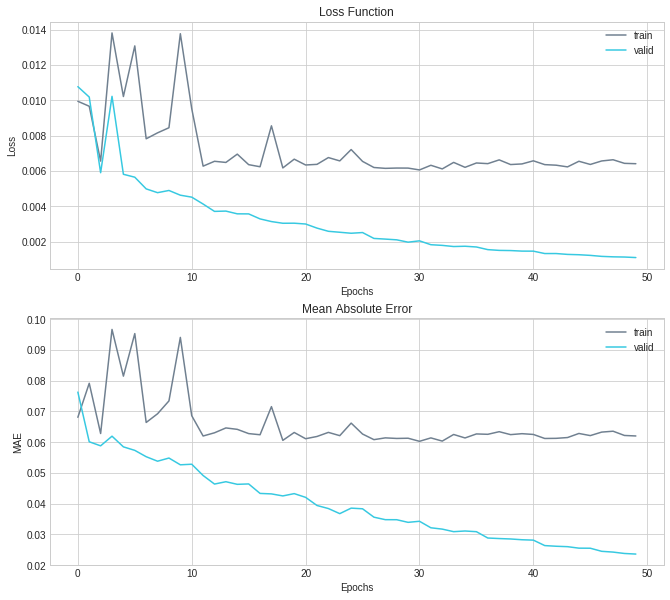

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9600203542070578
EV score. Valid:  0.8755733772601324
EV score. Test:  0.7944603996246536
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9597967465755797
R2 score. Valid:  0.8751740535751148
R2 score. Test:  0.7888628052163322
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.0016974438314086087
MSE score. Valid:  0.006059796448138156
MSE score. Test:  0.011012394628777821
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.030556707998515346
MAE score. Valid:  0.060250461070556344
MAE score. Test:  0.06478343527857214
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.022680397987365652
MdAE score. Valid:  0.04466597366333003
MdAE score. Test:  0.03813749456405641


In [11]:
history_plot(history,50)
mlp_model1.load_weights(fw)
y_train_mlp1=mlp_model1.predict(X_train1)
y_valid_mlp1=mlp_model1.predict(X_valid1)
y_test_mlp1=mlp_model1.predict(X_test1)
scores('MLP; Economic Need Index',
       y_train1,y_valid1,y_test1,
       y_train_mlp1,y_valid_mlp1,y_test_mlp1)

### MLP => The second set of features and targets

In [12]:
def mlp_model2():
    model=Sequential()    
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))   
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model2=mlp_model2()

In [13]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,
                             save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model2.fit(X_train2,y_train2, 
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid2,y_valid2),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 4s - loss: 6937.1700 - mean_absolute_error: 12.7068 - val_loss: 5.1241 - val_mean_absolute_error: 2.0358

Epoch 00001: val_loss improved from inf to 5.12410, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 4s - loss: 27.4543 - mean_absolute_error: 1.8748 - val_loss: 0.6698 - val_mean_absolute_error: 0.6260

Epoch 00002: val_loss improved from 5.12410 to 0.66977, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 4s - loss: 0.8558 - mean_absolute_error: 0.6970 - val_loss: 2.0473 - val_mean_absolute_error: 1.1882

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 4s - loss: 1.7079 - mean_absolute_error: 0.8101 - val_loss: 1.2929 - val_mean_absolute_error: 0.8718

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 4s - loss: 1.5833 - mean_absolute_error: 0.7205 - val_loss: 0.4231 - val_mean_absolute_error: 0.4657

Epoch 00005: val_loss improved from 0.66977 to 0.42306, saving model to weights.passnyc.hdf5
Epoch 6/100


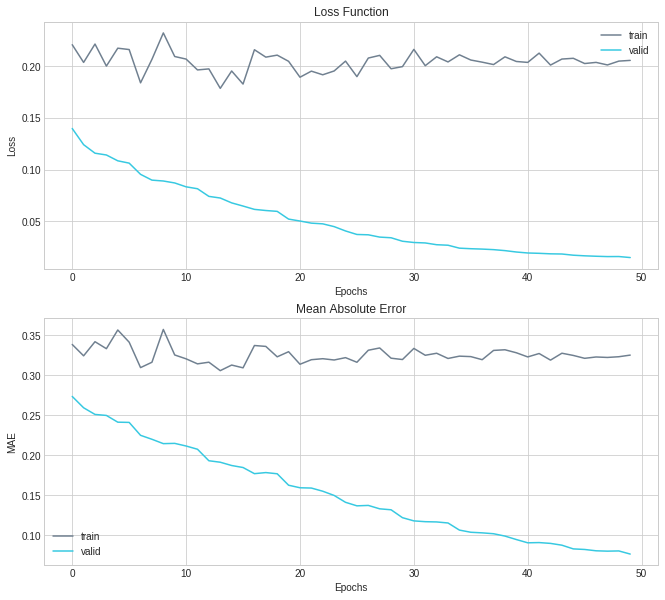

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9222418095660874
EV score. Valid:  0.7276972479603059
EV score. Test:  0.6500245794714524
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9220933633419208
R2 score. Valid:  0.7271131886306106
R2 score. Test:  0.6488873091337231
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.0563910426326749
MSE score. Valid:  0.1785452214039224
MSE score. Test:  0.39283178902315696
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.16728673387857737
MAE score. Valid:  0.3057054053497046
MAE score. Test:  0.40335980312816766
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.12048819135485545
MdAE score. Valid:  0.21219691581474437
MdAE score. Test:  0.2732478263675756


In [14]:
history_plot(history,50)
mlp_model2.load_weights(fw)
y_train_mlp2=mlp_model2.predict(X_train2)
y_valid_mlp2=mlp_model2.predict(X_valid2)
y_test_mlp2=mlp_model2.predict(X_test2)
scores('MLP; School Income Estimate',
       y_train2,y_valid2,y_test2,
       y_train_mlp2,y_valid_mlp2,y_test_mlp2)

### CNN => The first set of features and targets

In [15]:
def cnn_model1():
    model=Sequential()        
    model.add(Conv1D(138,3,padding='valid',
                     input_shape=(138,1)))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))
    model.add(Conv1D(138*4,3,padding='valid'))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))    
    model.add(Flatten())
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))
    model.add(Dense(1, kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
cnn_model1=cnn_model1()

In [16]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,
                             save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=cnn_model1.fit(
    X_train1.reshape(-1,138,1),y_train1, 
    epochs=100,batch_size=16,verbose=2,
    validation_data=(X_valid1.reshape(-1,138,1),y_valid1),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 19s - loss: 4593.8876 - mean_absolute_error: 21.3438 - val_loss: 41.5696 - val_mean_absolute_error: 4.6087

Epoch 00001: val_loss improved from inf to 41.56956, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 18s - loss: 72.9744 - mean_absolute_error: 5.1113 - val_loss: 7.8939 - val_mean_absolute_error: 2.2370

Epoch 00002: val_loss improved from 41.56956 to 7.89387, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 18s - loss: 42.8085 - mean_absolute_error: 3.0088 - val_loss: 8.1365 - val_mean_absolute_error: 2.1879

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 18s - loss: 21.4835 - mean_absolute_error: 2.1085 - val_loss: 3.1586 - val_mean_absolute_error: 1.4070

Epoch 00004: val_loss improved from 7.89387 to 3.15856, saving model to weights.passnyc.hdf5
Epoch 5/100
 - 18s - loss: 8.2123 - mean_absolute_error: 1.6441 - val_loss: 3.7856 - val_mean_absolute_error: 1.8075

Epoch 00005: val_loss did not improve
Ep

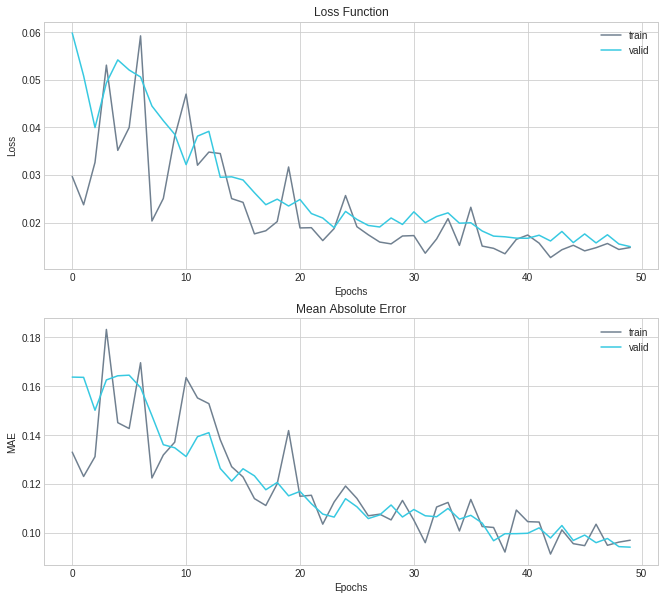

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
CNN; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.7610435994706359
EV score. Valid:  0.7466286953401355
EV score. Test:  0.7635380312380735
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.7597288316941521
R2 score. Valid:  0.7396414106653049
R2 score. Test:  0.7633127220103249
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.010144622083205995
MSE score. Valid:  0.012639359845287053
MSE score. Test:  0.012345023867083997
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.07934829102373639
MAE score. Valid:  0.09138387451115554
MAE score. Test:  0.08725291139818728
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.06650435829162604
MdAE score. Valid:  0.08023621225357058
MdAE score. Test:  0.06976805615425102


In [17]:
history_plot(history,50)
cnn_model1.load_weights(fw)
y_train_cnn1=cnn_model1\
.predict(X_train1.reshape(-1,138,1))
y_valid_cnn1=cnn_model1\
.predict(X_valid1.reshape(-1,138,1))
y_test_cnn1=cnn_model1\
.predict(X_test1.reshape(-1,138,1))
scores('CNN; Economic Need Index',
       y_train1,y_valid1,y_test1,
       y_train_cnn1,y_valid_cnn1,y_test_cnn1)

### CNN => The second set of features and targets

In [18]:
def cnn_model2():
    model=Sequential()
    model.add(Conv1D(138,5,padding='valid',
                     input_shape=(138,1)))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))
    model.add(Conv1D(138*4,5,padding='valid'))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))   
    model.add(Flatten())
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
cnn_model2=cnn_model2()

In [19]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,
                             save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=cnn_model2.fit(
    X_train2.reshape(-1,138,1),y_train2, 
    epochs=100,batch_size=16,verbose=2,
    validation_data=(X_valid2.reshape(-1,138,1),y_valid2),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 22s - loss: 63349.3904 - mean_absolute_error: 41.3803 - val_loss: 99.6050 - val_mean_absolute_error: 6.6665

Epoch 00001: val_loss improved from inf to 99.60497, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 20s - loss: 107.6411 - mean_absolute_error: 6.1335 - val_loss: 14.2220 - val_mean_absolute_error: 3.2115

Epoch 00002: val_loss improved from 99.60497 to 14.22199, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 20s - loss: 72.4303 - mean_absolute_error: 4.0224 - val_loss: 161.6014 - val_mean_absolute_error: 5.7793

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 20s - loss: 34.0985 - mean_absolute_error: 3.2136 - val_loss: 25.2634 - val_mean_absolute_error: 4.2534

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 20s - loss: 37.8407 - mean_absolute_error: 3.0289 - val_loss: 8.8138 - val_mean_absolute_error: 1.4952

Epoch 00005: val_loss improved from 14.22199 to 8.81382, saving model to weights.passny

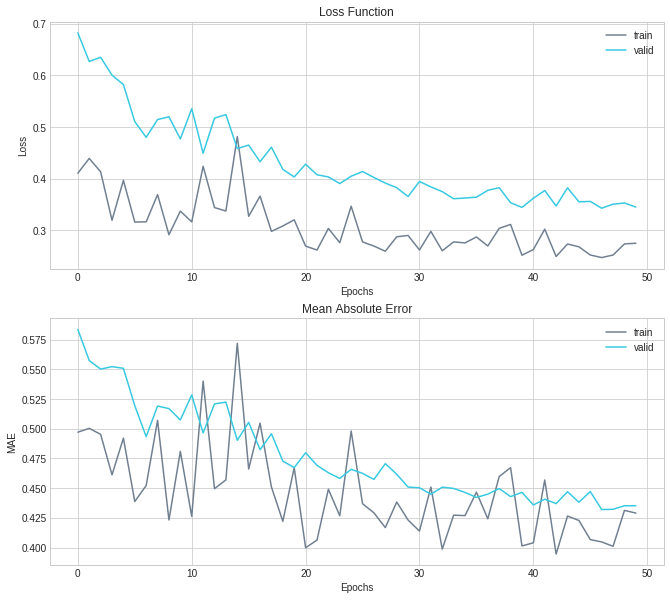

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
CNN; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.5751318626253201
EV score. Valid:  0.6415861724356988
EV score. Test:  0.5990357727903537
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.5717732231443998
R2 score. Valid:  0.622770041254716
R2 score. Test:  0.5983189768297481
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.3099627382978914
MSE score. Valid:  0.24681517646962542
MSE score. Test:  0.44940863447376356
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.4171107716940952
MAE score. Valid:  0.40472719275070457
MAE score. Test:  0.4675097728361599
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.3476857353693995
MdAE score. Valid:  0.3760755150556553
MdAE score. Test:  0.38902650911183323


In [20]:
history_plot(history,50)
cnn_model2.load_weights(fw)
y_train_cnn2=cnn_model2\
.predict(X_train2.reshape(-1,138,1))
y_valid_cnn2=cnn_model2\
.predict(X_valid2.reshape(-1,138,1))
y_test_cnn2=cnn_model2\
.predict(X_test2.reshape(-1,138,1))
scores('CNN; School Income Estimate',
       y_train2,y_valid2,y_test2,
       y_train_cnn2,y_valid_cnn2,y_test_cnn2)

### RNN => The first set of features and targets

In [21]:
def rnn_model1():
    model=Sequential()    
    model.add(LSTM(138,return_sequences=True,
                   input_shape=(1,138)))
    model.add(LSTM(138*4,return_sequences=False))     
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.1))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',
                  metrics=['mae'])     
    return model 
rnn_model1=rnn_model1()

In [22]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,
                             save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=rnn_model1.fit(
    X_train1.reshape(-1,1,138),y_train1, 
    epochs=100,batch_size=16,verbose=2,
    validation_data=(X_valid1.reshape(-1,1,138),y_valid1),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 4s - loss: 0.0432 - mean_absolute_error: 0.1573 - val_loss: 0.0206 - val_mean_absolute_error: 0.1155

Epoch 00001: val_loss improved from inf to 0.02060, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 3s - loss: 0.0245 - mean_absolute_error: 0.1259 - val_loss: 0.0121 - val_mean_absolute_error: 0.0894

Epoch 00002: val_loss improved from 0.02060 to 0.01209, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 3s - loss: 0.0194 - mean_absolute_error: 0.1127 - val_loss: 0.0239 - val_mean_absolute_error: 0.1274

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 3s - loss: 0.0166 - mean_absolute_error: 0.1049 - val_loss: 0.0187 - val_mean_absolute_error: 0.1024

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 3s - loss: 0.0149 - mean_absolute_error: 0.0971 - val_loss: 0.0167 - val_mean_absolute_error: 0.0945

Epoch 00005: val_loss did not improve
Epoch 6/100
 - 3s - loss: 0.0141 - mean_absolute_error: 0.0929 - val_los

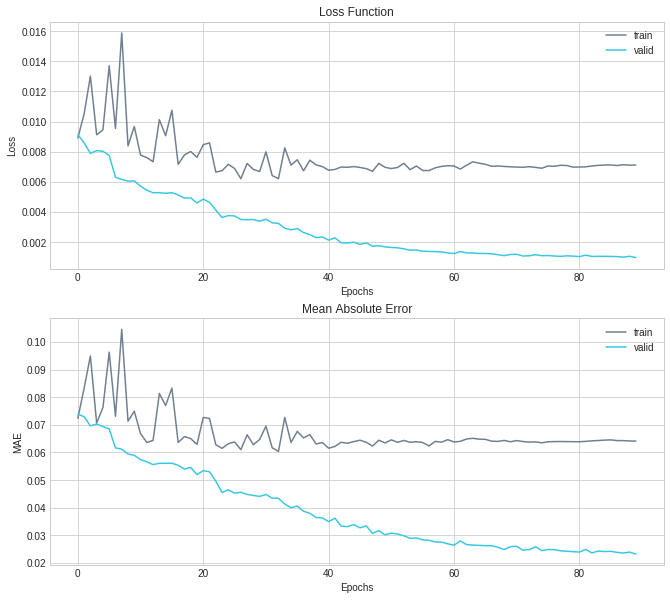

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
RNN; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9327667304282374
EV score. Valid:  0.8801807386896631
EV score. Test:  0.8690984189328494
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9265521105041006
R2 score. Valid:  0.8722251100161578
R2 score. Test:  0.8572877293767602
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.0031010840251815583
MSE score. Valid:  0.006202955768905502
MSE score. Test:  0.0074435195754226306
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.04256646093336413
MAE score. Valid:  0.061000500638653914
MAE score. Test:  0.06572126311482862
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.0337593998908996
MdAE score. Valid:  0.04782561302185062
MdAE score. Test:  0.04901527261734012


In [23]:
history_plot(history,10)
rnn_model1.load_weights(fw)
y_train_rnn1=rnn_model1\
.predict(X_train1.reshape(-1,1,138))
y_valid_rnn1=rnn_model1\
.predict(X_valid1.reshape(-1,1,138))
y_test_rnn1=rnn_model1\
.predict(X_test1.reshape(-1,1,138))
scores('RNN; Economic Need Index',
       y_train1,y_valid1,y_test1,
       y_train_rnn1,y_valid_rnn1,y_test_rnn1)

### RNN => The second set of features and targets

In [24]:
def rnn_model2():
    model=Sequential()   
    model.add(LSTM(138,return_sequences=True,
                   input_shape=(1,138)))
    model.add(LSTM(138*4,return_sequences=False))     
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.1))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',
                  metrics=['mae'])     
    return model 
rnn_model2=rnn_model2()

In [25]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,
                             save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=rnn_model2.fit(
    X_train2.reshape(-1,1,138),y_train2, 
    epochs=100,batch_size=16,verbose=2,
    validation_data=(X_valid2.reshape(-1,1,138),y_valid2),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 5s - loss: 0.4622 - mean_absolute_error: 0.4992 - val_loss: 0.3538 - val_mean_absolute_error: 0.5032

Epoch 00001: val_loss improved from inf to 0.35384, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 3s - loss: 0.3921 - mean_absolute_error: 0.4601 - val_loss: 0.4241 - val_mean_absolute_error: 0.5197

Epoch 00002: val_loss did not improve
Epoch 3/100
 - 3s - loss: 0.3470 - mean_absolute_error: 0.4341 - val_loss: 0.2899 - val_mean_absolute_error: 0.4099

Epoch 00003: val_loss improved from 0.35384 to 0.28994, saving model to weights.passnyc.hdf5
Epoch 4/100
 - 3s - loss: 0.3320 - mean_absolute_error: 0.4181 - val_loss: 0.2521 - val_mean_absolute_error: 0.4034

Epoch 00004: val_loss improved from 0.28994 to 0.25214, saving model to weights.passnyc.hdf5
Epoch 5/100
 - 3s - loss: 0.3347 - mean_absolute_error: 0.4243 - val_loss: 0.2457 - val_mean_absolute_error: 0.3963

Epoch 00005: val_loss improved from 0.25214 to 0.24569,

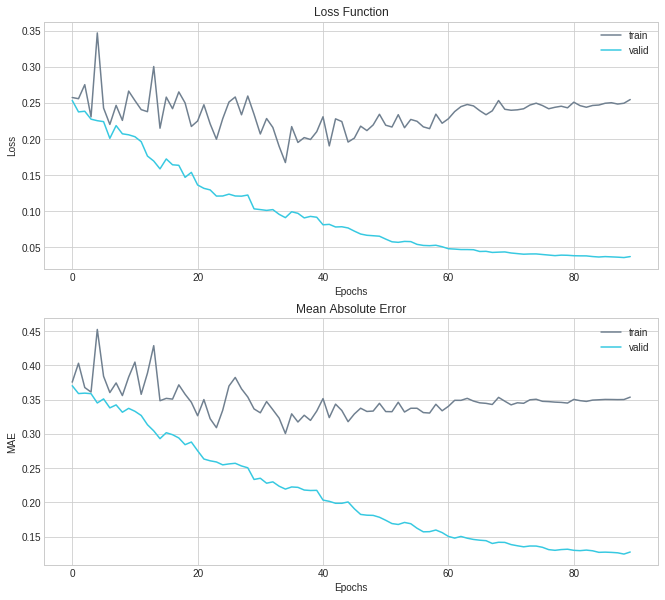

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
RNN; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8751746075730699
EV score. Valid:  0.7440630965448063
EV score. Test:  0.595377308406627
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8743714261177882
R2 score. Valid:  0.7440511034510733
R2 score. Test:  0.591959976931794
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.09093354006239582
MSE score. Valid:  0.16746303045242691
MSE score. Test:  0.4565232087152931
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.21128620251991914
MAE score. Valid:  0.3005782785949906
MAE score. Test:  0.42981813652440215
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.15091360279880203
MdAE score. Valid:  0.2311148160094405
MdAE score. Test:  0.28439407639211584


In [26]:
history_plot(history,10)
rnn_model2.load_weights(fw)
y_train_rnn2=rnn_model2\
.predict(X_train2.reshape(-1,1,138))
y_valid_rnn2=rnn_model2\
.predict(X_valid2.reshape(-1,1,138))
y_test_rnn2=rnn_model2\
.predict(X_test2.reshape(-1,1,138))
scores('RNN; School Income Estimate',
       y_train2,y_valid2,y_test2,
       y_train_rnn2,y_valid_rnn2,y_test_rnn2)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Display Predictions</h1>

### The first set of features and targets

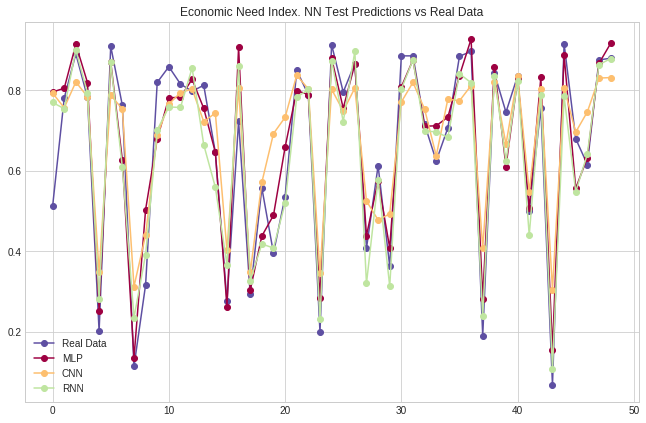

In [27]:
plt.figure(figsize=(11,7)); n=50
plt.plot(y_test1[1:n],'-o',
         color=spectral_cmap[3],label='Real Data')
plt.plot(y_test_mlp1[1:n],'-o',
         color=spectral_cmap[0],label='MLP')
plt.plot(y_test_cnn1[1:n],'-o',
         color=spectral_cmap[1],label='CNN')
plt.plot(y_test_rnn1[1:n],'-o',
         color=spectral_cmap[2],label='RNN')
ti="Economic Need Index. "+\
   "NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

### The second set of features and targets

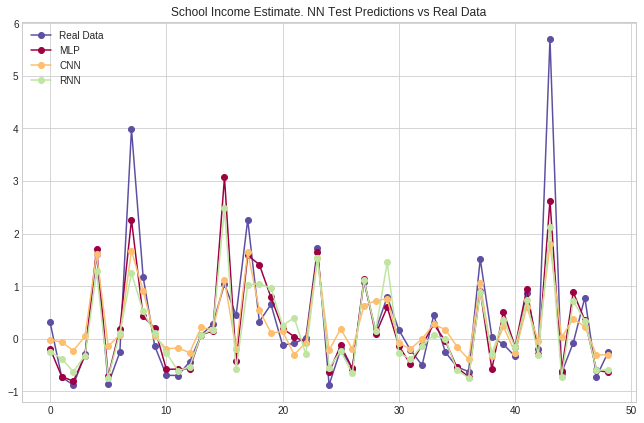

In [28]:
plt.figure(figsize=(11,7))
plt.plot(y_test2[1:n],'-o',
         color=spectral_cmap[3],label='Real Data')
plt.plot(y_test_mlp2[1:n],'-o',
         color=spectral_cmap[0],label='MLP')
plt.plot(y_test_cnn2[1:n],'-o',
         color=spectral_cmap[1],label='CNN')
plt.plot(y_test_rnn2[1:n],'-o',
         color=spectral_cmap[2],label='RNN')
ti="School Income Estimate. "+\
   "NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp;  Let's Go Ahead</h1>

The results obtained could be a base for several generalizing assumptions:

1) Neural networks such as a multilayer perceptron (MLP) and a recurrent neural network (RNN) better than a convolutional neural network (CNN) cope with the prediction of regression in the presence of mixed data (financial, sociological, etc.)

2) Characteristics of the educational process and results, social environment, ethnic composition, administrative affiliation are sufficient to predict the level of the indicator "Economic Need Index".

3) The same variables are not enough for predicting "School Income Estimate". The information must be supplemented with indicators of economic activity in general for the state and the economic situation in the district adjacent to the school.

It' s time to move to the next step.

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2)